In [41]:
#STEP 1: IMPORTING THE DATASET AND SLICING THE ONES TO BE USED
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target #represents the thing im about predicting

#STEP 2: SPLITTING INTO THE TEST AND TRAIN SAMPLES
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#STEP 3: THE FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#STEP 4: THE PERCEPTRON MODEL
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

#STEP 5: PREDICTION
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

#STEP 6: ACCURACY SCORE
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

#STEP 7: PLOTTING
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier,
test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')#setup marker generator and color map
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

# plot the decision surface
resolution = ""
x1_min=( X[:, 0].min() - 1, np.int64 )

x1_max =(X[:, 0].max() + 1, np.int64)

x2_min = (X[:, 1].min() - 1, np.int64 )

x2_max = (X[:, 1].max() + 1, np.int64 )


xx1= np.meshgrid(np.arange(x1_min, x1_max))

xx2 = np.arange(x2_min, x2_max, resolution="")


Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
# plot all samples
X_test, y_test = X[test_idx, :], y[test_idx]
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
alpha=0.8, c=cmap(idx),
marker=markers[idx], label=cl)
# highlight test samples
if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
plt.scatter(X_test[:, 0], X_test[:, 1], c='',
alpha=1.0, linewidth=1, marker='o',
s=55, label='test set')

Misclassified samples: 5
Accuracy: 0.89


No handles with labels found to put in legend.


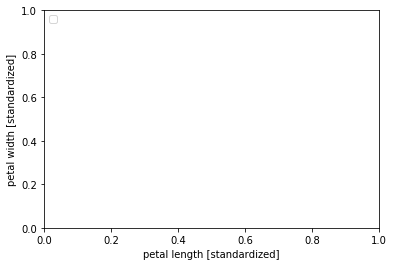

In [39]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
y=y_combined,
classifier=ppn,
test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [50]:
import quandl
df=quandl.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
